# Weather prediction project using rain in Australia dataset

# By: Wathela Alhassan

### Dataset available at https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download

### Task:  Rain prediciton, to predict if it would rain today or not (YES & NO)
### Type: Classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data exploration

In [ ]:
# Read in dataset and show 5 first rows
df = pd.read_csv("drive/MyDrive/ML_project/data/weatherAUS.csv")
df.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Show the data info: columns and their type and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
# Show the data stats descriptipns
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Data cleaning

In [ ]:
# Show columns names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Filter columns
col_to_drop = ["Date", "Location", "Rainfall", "RainTomorrow"]
df.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
# Show columns
df.columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday'],
      dtype='object')

In [ ]:
### check nan values percentage in each cols

missing_values = df.isna().mean()
missing_values

MinTemp          0.010209
MaxTemp          0.008669
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
dtype: float64

In [ ]:
# Filter cols with 40% or more nan values
col_with40nan = missing_values[missing_values >= 0.40]
col_with40nan

Evaporation    0.431665
Sunshine       0.480098
Cloud3pm       0.408071
dtype: float64

In [ ]:
# Drop cols with nan values 40% or more
df.drop(col_with40nan.index, axis=1, inplace=True)
df.columns

Index(['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [ ]:
# Divide data into features X and target y

X = df.drop("RainToday", axis=1)
y = df.RainToday.map({"No":0,"Yes":1}) # replace "yes"and "no" with 1 and 0 respectively

### Preprocessing piplines

In [ ]:
# build a pipe line to preprocess cateogrical data: impute misssings and one-hot encode
catg_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)


# Build a pipline to preprocess numeric data: impute missings and scale
num_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")),
           ("scale", StandardScaler())]
)

In [ ]:
# Divide dataframe into numeric and categorical
cat_cols = X.select_dtypes(exclude="number").columns # get only categorical columns
num_cols = X.select_dtypes(include="number").columns # get only numric columns

In [ ]:
# Bulid a processor to preprocess the data
pre_processor = ColumnTransformer(
    transformers=[
        ("numeric", num_pipeline, num_cols),
        ("categorical", catg_pipeline, cat_cols),
    ]
)

In [ ]:
# preprocess target and features
X_processed = pre_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1))


# Spilt data into training and test segements
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218
)

### Model training and testing: KNN, Random Forest, Desicion Tree, Naive Bayes, Support Vecotr Machine, Multi-perceptron

In [ ]:
# initialize models
models = []

models.append(('KNN', KNeighborsClassifier() ))
models.append(('DTC', DecisionTreeClassifier() ))
models.append(('RFC', RandomForestClassifier() ))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto') ))
models.append(('MLP', MLPClassifier(max_iter=1000) ))

In [ ]:
# Train and test models with 5 CV: accuracy and roc auc scores metric
results_dict = dict()
for name, model in models:
  cv_result = cross_validate(model, X_train, y_train.ravel(), cv=5, scoring=["accuracy","roc_auc"]) # use corss_validate because we using more than one meteric for evaluation
  results_dict[name] = cv_result
  print(name, cv_result)

KNN {'fit_time': array([0.03011084, 0.02015591, 0.047261  , 0.05092072, 0.04950666]), 'score_time': array([74.26078415, 73.03540683, 66.85300064, 69.96820092, 68.45520353]), 'test_accuracy': array([0.81740685, 0.81387781, 0.81708603, 0.82098171, 0.81383198]), 'test_roc_auc': array([0.79486746, 0.79549934, 0.79427334, 0.80170885, 0.79150513])}
DTC {'fit_time': array([1.23535895, 1.11028957, 1.11840105, 1.09612107, 1.09438872]), 'score_time': array([0.0240221 , 0.02319002, 0.02503967, 0.02038741, 0.02089596]), 'test_accuracy': array([0.77629589, 0.77767084, 0.77304184, 0.78170402, 0.77748751]), 'test_roc_auc': array([0.68441426, 0.67704899, 0.67455363, 0.68259467, 0.68084685])}
RFC {'fit_time': array([11.87203217, 11.92989206, 12.27207494, 12.02129769, 11.8445518 ]), 'score_time': array([1.05778527, 1.07335687, 1.11032057, 1.07665658, 1.06561136]), 'test_accuracy': array([0.84577662, 0.84398918, 0.84463083, 0.84376003, 0.84485998]), 'test_roc_auc': array([0.87232661, 0.86784943, 0.870208

In [ ]:
for mdl, resl in results_dict.items():
  print(mdl,resl.get('test_accuracy'))

KNN [0.81740685 0.81387781 0.81708603 0.82098171 0.81383198]
DTC [0.77629589 0.77767084 0.77304184 0.78170402 0.77748751]
RFC [0.84577662 0.84398918 0.84463083 0.84376003 0.84485998]
NB [0.66355012 0.66084605 0.6577295  0.66295431 0.65108392]
SVM [0.84073514 0.84046015 0.84146844 0.83830606 0.83752693]
MLP [0.83564783 0.82840643 0.8347312  0.8329896  0.83331042]


### Models evaluation

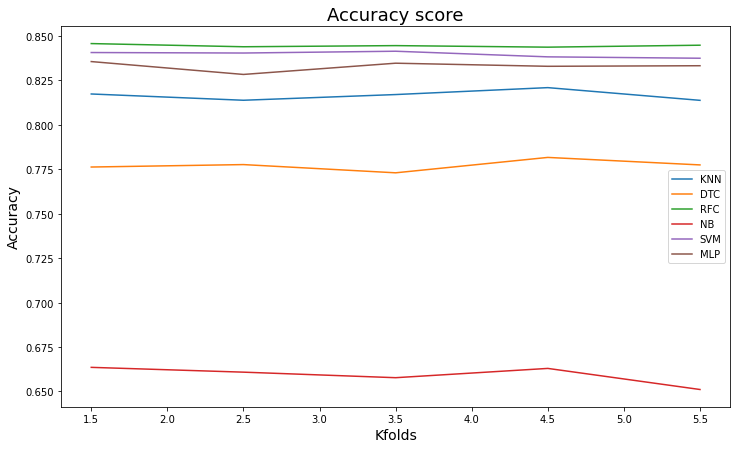

In [ ]:
# Visulize the accuracy of all models
k_cross_val = [1.5,2.5,3.5,4.5,5.5]
plt.figure(figsize=[12,7])
for mdl, resl in results_dict.items():
  plt.plot(k_cross_val,resl.get("test_accuracy"), label=mdl) # get the test accuracy score for each model and plot
plt.title("Accuracy score", fontsize=18) # set title
plt.xlabel("Kfolds", fontsize=14) # set x labels
plt.ylabel("Accuracy", fontsize=14) # set y labels
plt.legend(loc='best') # add and show legend
plt.show() # display

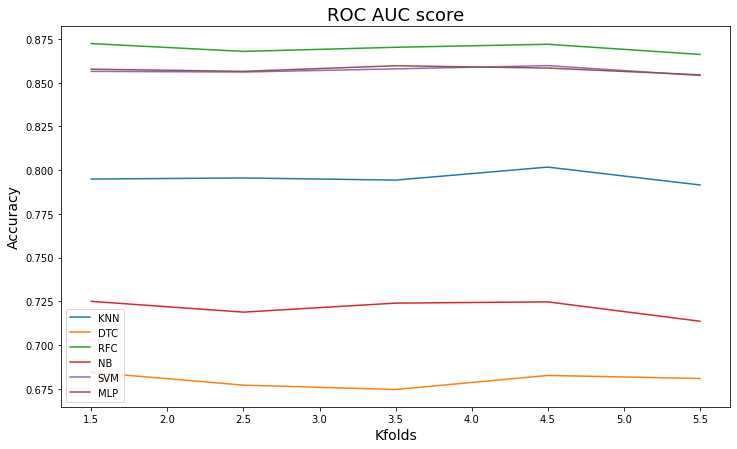

In [ ]:
# Visulize the ROC AUC score of all models
k_cross_val = [1.5,2.5,3.5,4.5,5.5]
plt.figure(figsize=[12,7])
for mdl, resl in results_dict.items():
  plt.plot(k_cross_val,resl.get('test_roc_auc'), label=mdl) # get the test accuracy score for each model and plot

plt.title("ROC AUC score", fontsize=18) # set title
plt.xlabel("Kfolds", fontsize=14) # set x labels
plt.ylabel("Accuracy", fontsize=14) # set y labels
plt.legend(loc='best') # add and show legend
plt.show() # display

### Hyper-parameters tuning for best performing model using grid search: RF classifier

In [ ]:
# Init classifier
rf_cls = RandomForestClassifier()

# define parameters and values
param_grid = {"n_estimators":[200,300,500],
              "criterion": ["gini", "entropy"],
              "max_depth": [50,500,1000]}

# Define a grid object
grid_cv = GridSearchCV(rf_cls, param_grid=param_grid, cv=5)


# Fit
grid_cv.fit(X_train, y_train.ravel())

# Print best parameters and best score
print(grid_cv.best_score_, grid_cv.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

0.8469224070764012 {'criterion': 'entropy', 'max_depth': 1000, 'n_estimators': 500}


###  Train RF with best param on the entire dataset

In [ ]:
# Init classifier
rf_cls = RandomForestClassifier(criterion='entropy', max_depth=1000, n_estimators=500)

# Fit
rf_cls.fit(X_train, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_depth=1000, n_estimators=500)

In [ ]:
# Predict testing data
y_pred = rf_cls.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.8487831706311013


In [ ]:
# produce a confusion matrix
cm = confusion_matrix(y_test, y_pred)

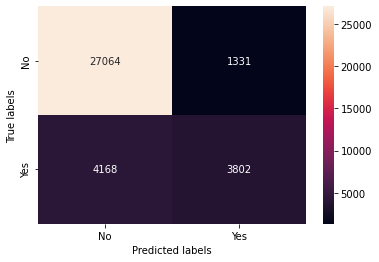

In [ ]:
# plot confusion matrix
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

#set labels
ax.xaxis.set_ticklabels(["No", "Yes"])
ax.yaxis.set_ticklabels(["No", "Yes"])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# display
plt.show()

In [ ]:
# Print classification report
report = classification_report(y_test, y_pred, target_names=["No", "Yes"])

print(report)

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     28395
         Yes       0.74      0.48      0.58      7970

    accuracy                           0.85     36365
   macro avg       0.80      0.72      0.74     36365
weighted avg       0.84      0.85      0.84     36365



In [ ]:
print(f""" The reson we got better results for "No" and less precise result for "Yes" prediction is that,
the size of the classes are not balanced, means we have more samples for calss "No" than we have for class "Yes". No of samples for each class is: \n{df.RainToday.value_counts()}""")

 The reson we got better results for "No" and less precise result for "Yes" prediction is that,
the size of the classes are not balanced, means we have more samples for calss "No" than we have for class "Yes". No of samples for each class is: 
No     110319
Yes     31880
Name: RainToday, dtype: int64


In [ ]:
# Calculate ROC score
rf_roc_score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {round(rf_roc_score,3)}")

ROC AUC Score: 0.715


In [ ]:
y_prob = rf_cls.predict_proba(X_test) # predict probapilities

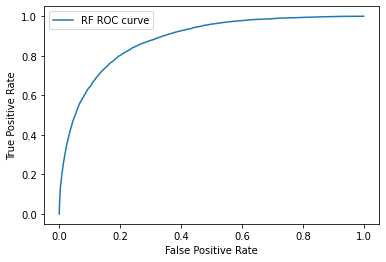

In [ ]:
# Make an ROC curve

fpr_curve, tpr_curve, threshold = roc_curve(y_test.ravel(), y_prob[:,1])

# plot roc curve
plt.figure()
plt.plot(fpr_curve, tpr_curve, label="RF ROC curve")

# set labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show legend
plt.legend(loc="best")

# display
plt.show()